In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [17]:
from catboost import CatBoostClassifier
clf_cat = CatBoostClassifier()
clf_cat.load_model('../models/catboost_classifier')

In [31]:
X = pd.read_csv("../inter_data/X.csv")
y = pd.read_csv("../inter_data/y.csv")["target"].values
X = X[[col for col in X.columns if "Unnamed" not in col]]


In [33]:
del X["cm_cd"]

Text(0.5, 0, 'False Positive Rate')

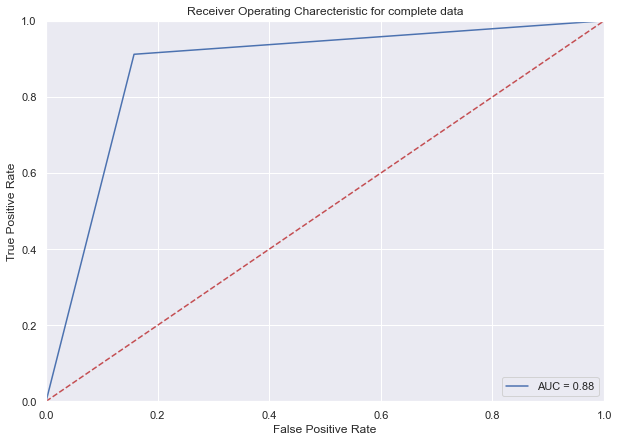

In [35]:
y_pred = clf_cat.predict(X)
results = pd.DataFrame({'Converted':y, 'Converted_prob':y_pred.reshape(len(y_pred)), "prospect_ID": X.index})

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for complete data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [37]:
print("number of referrers model captured in the data:", len(results[(results["Converted"] == 1) & (results["Converted_prob"] == 1)]))
print("number of actual referrers in the data:", len(results[(results["Converted"] == 1)]))

number of referrers model captured in the data: 29418
number of actual referrers in the data: 32258


In [52]:
X = pd.read_csv("../inter_data/X.csv")
X = X[[col for col in X.columns if "Unnamed" not in col]]
df_probable = X[X.index.isin(results[(results["Converted"] == 0) & (results["Converted_prob"] == 1)]["prospect_ID"])]

In [57]:
# try:
#     !mkdir ../results
# except:
#     pass
df_probable.to_csv('../results/probable_referrers20211129.csv')

In [51]:
results[(results["Converted"] == 0) & (results["Converted_prob"] == 1)]

,Converted,Converted_prob,prospect_ID
0,0,1,0
7,0,1,7
66,0,1,66
95,0,1,95
109,0,1,109
...,...,...,...
54007,0,1,54007
54049,0,1,54049
54051,0,1,54051
54098,0,1,54098


In [58]:
X

,cm_cd,IncomePA,cm_occup,E2Channel,IsKarvy,KRA YN,age,months_since_last_login,months_since_last_trade,dp_holding,total_logins_one_year,total_trades_one_year
0,11154521,<=1L,P,CAT,0,N,23.0,132.000000,132.000000,0.0,0.0,0.0
1,SHIRAZUI,5_10L,P,CAT,0,Y,21.0,6.133384,0.515198,0.0,13.0,1.0
2,11975396,1_5L,S,CAT,0,N,44.0,132.000000,132.000000,0.0,0.0,0.0
3,MSHAHRO7,<=1L,S,CAT,0,N,22.0,20.359548,132.000000,0.0,0.0,0.0
4,24276798,<=1L,S,CAT,0,Y,42.0,0.515198,0.810892,0.0,93.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54105,11288787,5_10L,P,CAT,0,Y,27.0,1.106591,132.000000,0.0,10.0,0.0
54106,92516982,1_5L,S,CAT,0,N,35.0,132.000000,132.000000,0.0,0.0,1.0
54107,17482977,5_10L,P,CAT,0,N,72.0,0.515198,0.745183,0.0,1400.0,56.0
54108,70629679,<=1L,S,CAT,0,Y,19.0,0.778038,0.810892,0.0,6.0,1.0


In [62]:
df_output = X.copy()
df_output["prediction"] = y_pred.reshape(len(y_pred))
df_output["target"] = y

In [64]:
df_output.to_csv("../results/model_prediction.csv")